## The Sparks Foundation Task 2 ##
**Task: Prediction using Unsupervised ML**

Problem Statement: From the given "iris" dataset, predict the optimum number of clusters and represent it visually

**Importing the libraries**

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
%matplotlib inline
import warnings 
warnings.simplefilter('ignore')
plt.style.use('ggplot')

**Load the dataset**

In [9]:
# Load the Iris dataset
iris = load_iris()
X = iris.data

**Model Training**

In [10]:
# Initialize an empty list to store the within-cluster sum of squares (WCSS) for each number of clusters
wcss = []

In [11]:
# Determine the optimal number of clusters using the elbow method
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

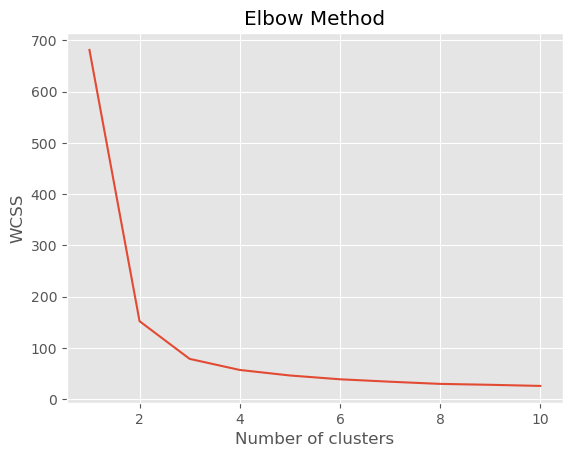

In [12]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [13]:
# From the elbow plot, it seems the optimal number of clusters is 3
# Perform k-means clustering with k=3
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

**Visualize the clusters**

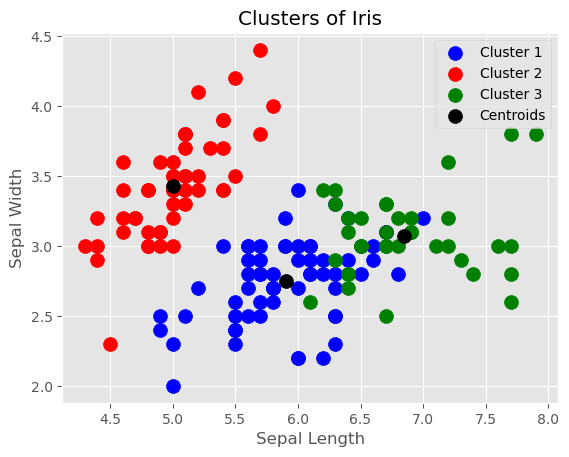

In [14]:
# Visualize the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c='blue', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c='red', label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', label='Centroids')
plt.title('Clusters of Iris')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()